In [24]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
import sympy
from scipy import stats as stats
from scipy.stats import norm as norm

1) A little introductory brain teaser. Which is more probable when rolling 2 six-sided dice: rolling snake eyes (two ones) or rolling sevens (dice sum to seven)? What is the ratio of the probabilities?

It's more likely that sevens would be rolled than snake eyes, because there are multiple ways to make seven out of the numbers 1-6, but there is only one way to make snake eyes.

The probability of rolling snake eyes is $\frac{1}{36}$, but the probability of rolling 7 is $\frac{6}{36}= \frac{1}{6}$. The ratio of these probabilities are 1:6. 

$\begin{table}[]
\begin{tabular}{ll}
\textbf{Number (Sum)} & \textbf{Probability} \\
2                     & 1/36                 \\
3                     & 2/36                 \\
4                     & 3/36                 \\
5                     & 4/36                 \\
6                     & 5/36                 \\
7                     & 6/36                 \\
8                     & 5/36                 \\
9                     & 4/36                 \\
10                    & 3/36                 \\
11                    & 2/36                 \\
12                    & 1/36                
\end{tabular}
\end{table}$

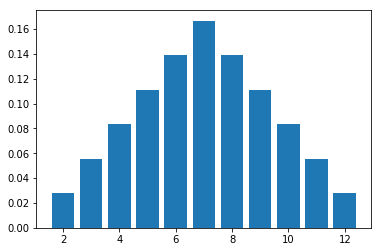

In [4]:
#2) Following what we did in class show how to use the convolution operator to determine the probability of the sum of 2 
#six sided dice. Do both analytically (math & counting) and numerically (computer program). Beware the implicit definition 
#of the values (x-axis on histogram).
die1 = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
die2 = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]

dist = np.convolve(die1, die2)
vals= np.linspace(2, 12, num = 11)

plt.bar(vals, dist)
plt.show()

In [5]:
#3) Calculate the mean and the variance of the distribution in problem 2. Hint: this is surprisingly tricky, make sure 
#your result makes sense.

#x coord*y coord
mean = 0
vararray = []
for index in range(11):
    mean += (dist[index]*vals[index])

print("Mean of values ", mean)

for index in range(11):
    vararray.append((vals[index]-mean)**2 * dist[index])

print("Variance of values: ", sum(vararray))

Mean of values  7.0
Variance of values:  5.833333333333334


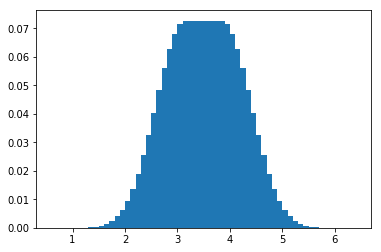

In [27]:
#4) Repeat 2, and graph the average of 10 dice. Is this is a Gaussian distribution? Explain in depth.
die1 = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
die2 = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]

dist = np.convolve(die1, die2)

for index in range(8):
    dist =np.convolve(dist, die2);
    
vals = []
for i in range(10, 61):
    vals.append(i/10)

plt.bar(vals, dist)
plt.show()

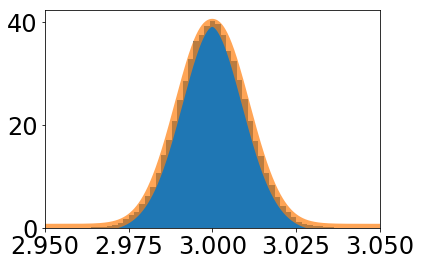

In [10]:
#5) Show that the sum and average of an initially Gaussian distribution is also a Guassian (can be analytic or numerical). 
d1 = stats.norm.rvs(loc = 3.0, scale = .01, size = 100000)
d2 = stats.norm.rvs(loc = 4.0, scale = .01, size = 100000)

fig, ax = plt.subplots(1, 1)
ax.hist(d1,50, density=True)
plt.tick_params(labelsize = 24)
plt.xlim([2.95,3.05])
x = np.linspace(2.95,3.05,1000)
ax.plot(x,stats.norm.pdf(x,loc = 3., scale = 0.01),linewidth = 8,alpha = 0.7)
plt.show()

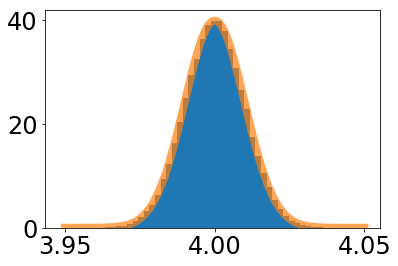

In [17]:
fig, ax = plt.subplots(1, 1)
ax.hist(d2,50, density=True)
plt.tick_params(labelsize = 24)
x = np.linspace(3.95,4.05,1000)
ax.plot(x, stats.norm.pdf(x,loc = 4., scale = 0.01),linewidth = 8,alpha = 0.7)
plt.show()

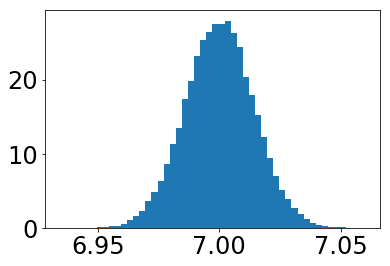

In [22]:
fig, ax = plt.subplots(1, 1)
ax.hist(d2+d1,50, density=True)
plt.tick_params(labelsize = 24)
x = np.linspace(6.95,7.05,2000)
plt.show()

How does the standard deviation of the resulting sum or average Gaussian change? This is a hugely important result. Explore what this means for integrating a signal over time.


As we can see from summing and averaging gaussian distributions, the standard deviation increases for summing and decreases for averaging. If we are taking data over different periods of time we would average the distribtions, resulting in a distribution with smaller standard deviations/variances, which means the data is more distributed around the mean.